In [11]:
import statistics
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


def plot_param_var_conf(sampledict, xvar, yvar):
    """
    Helper function for plot_all_vars. Plots the individual parameter vs
    variables passed.

    Args:
        ax: the axis to plot to
        df: dataframe that holds the data to be plotted
        var: variables to be taken from the dataframe
        param: which output variable to plot
    """
    x = np.array([])
    y = np.array([])
    std = np.array([])
    replicates = np.array([])
    
    for key in sorted(samples.keys()):
        value = np.array(samples[key])
        x = np.append(x,key) 
        y = np.append(y,sum(value)/len(value))
        std = np.append(std,statistics.stdev(value))
        replicates = np.append(replicates,len(value))


        
    err = (1.96 * std / np.sqrt(replicates))
    fig, ax = plt.subplots()
    ax.plot(x, y, c='k')
    ax.fill_between(x, y - err, y + err)
    
    if xvar == "compliance":
        plt.xlabel("Basic compliance")
    elif xvar == "shoplist":
        plt.xlabel("Length of shoplist")
    elif xvar == "customers":
        plt.xlabel("Number of customers")
    elif xvar == "prop":
        plt.xlabel("Proportion vaccinated")
    elif xvar == "vision":
        plt.xlabel("Vision")
                   
    plt.ylim([0, 100])
    plt.ylabel(yvar)
    
    plt.savefig("./results/OFAT_{}".format(xvar))


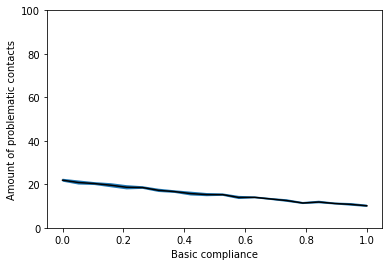

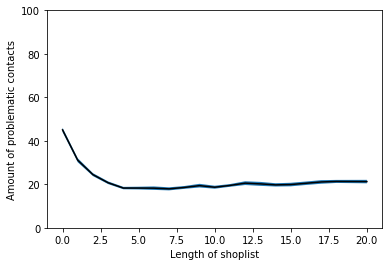

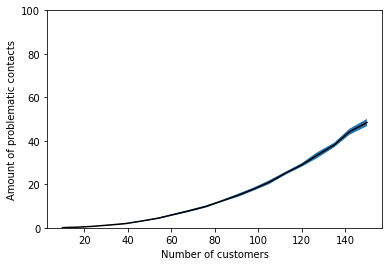

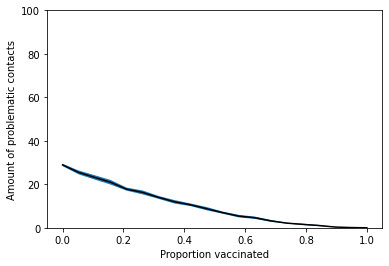

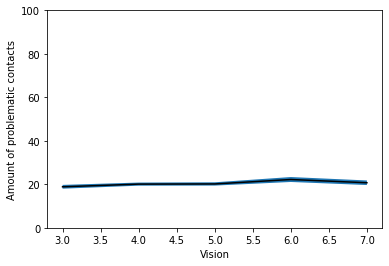

In [12]:


def add_to_dict(key, data):
    if key not in samples:
        samples[key] = [data]
    else:
        samples[key].append(data)

dirs = ["OFAT_basic_compliance", "OFAT_len_shoplist", "OFAT_N_customers", "OFAT_vaccination_prop", "OFAT_vision"]
path = './results/'

for directory in dirs:
    samples = {}
    
    parameter = ""

    for filename in os.listdir(path + directory):
        if filename.endswith(".csv"):
            df = pd.read_csv(os.path.join(path + directory, filename))
            #number_problematic_avg = df['n_problematic_contacts'].iloc[-1]
            number_problematic_avg = sum(df['n_problematic_contacts']) / len(df)
            splitted = filename.split("_")
            parameter = splitted[-3]
            sample = float(splitted[-2])
            #print(splitted, sample)

            add_to_dict(sample, number_problematic_avg)
    plot_param_var_conf(samples, parameter, "Amount of problematic contacts")